<a href="https://colab.research.google.com/github/Tagorenarne/ml-mini-project/blob/main/mlminiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Taking the csv file into colab



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as ps
from sklearn.model_selection import train_test_split
data=pd.read_csv('/content/sample_data/phishing.csv')
data = data.drop(["Index"],axis =1)
data['class'].unique()

array([-1,  1])

In [ ]:
#this line is used to understand the output properly
le=ps.LabelEncoder()
data['class']=le.fit_transform(data['class'])
data['class'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

In [ ]:
# nunique value in columns
data.nunique()

,0
UsingIP,2
LongURL,3
ShortURL,2
Symbol@,2
Redirecting//,2
PrefixSuffix-,2
SubDomains,3
HTTPS,3
DomainRegLen,2
Favicon,2


In [ ]:
data.describe().T # .T is for transpose

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [ ]:
X = data.drop(["class"],axis =1)
y = data["class"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# instantiate the model
tree = DecisionTreeClassifier(max_depth=5)

# fit the model
tree.fit(X_train, Y_train)

# predictions
Y_test_tree = tree.predict(X_test)
Y_train_tree = tree.predict(X_train)

# computing accuracy
acc_train_tree = accuracy_score(Y_train, Y_train_tree)
acc_test_tree = accuracy_score(Y_test, Y_test_tree)

# computing precision
precision_train_tree = precision_score(Y_train, Y_train_tree, average='binary')
precision_test_tree = precision_score(Y_test, Y_test_tree, average='binary')

# computing recall
recall_train_tree = recall_score(Y_train, Y_train_tree, average='binary')
recall_test_tree = recall_score(Y_test, Y_test_tree, average='binary')

# printing metrics
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

print("Decision Tree: Precision on training Data: {:.3f}".format(precision_train_tree))
print("Decision Tree: Precision on test Data: {:.3f}".format(precision_test_tree))

print("Decision Tree: Recall on training Data: {:.3f}".format(recall_train_tree))
print("Decision Tree: Recall on test Data: {:.3f}".format(recall_test_tree))


Decision Tree: Accuracy on training Data: 0.923
Decision Tree: Accuracy on test Data: 0.923
Decision Tree: Precision on training Data: 0.897
Decision Tree: Precision on test Data: 0.897
Decision Tree: Recall on training Data: 0.972
Decision Tree: Recall on test Data: 0.973


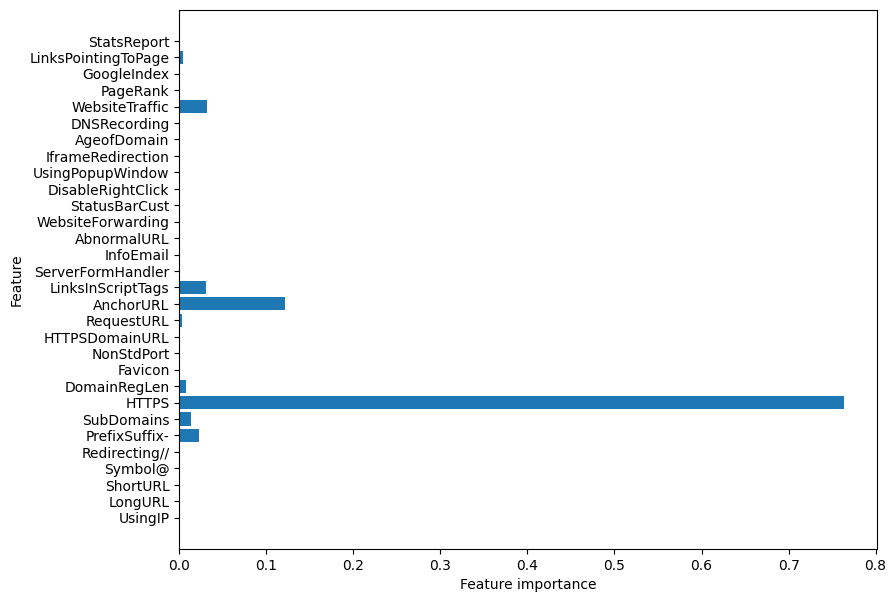

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

# fit the model
svm.fit(X_train, Y_train)

# predictions
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

# accuracy
acc_train_svm = accuracy_score(Y_train, y_train_svm)
acc_test_svm = accuracy_score(Y_test, y_test_svm)

# precision
precision_train_svm = precision_score(Y_train, y_train_svm, average='binary')
precision_test_svm = precision_score(Y_test, y_test_svm, average='binary')

# recall
recall_train_svm = recall_score(Y_train, y_train_svm, average='binary')
recall_test_svm = recall_score(Y_test, y_test_svm, average='binary')

# print metrics
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))

print("SVM: Precision on training Data: {:.3f}".format(precision_train_svm))
print("SVM: Precision on test Data: {:.3f}".format(precision_test_svm))

print("SVM: Recall on training Data: {:.3f}".format(recall_train_svm))
print("SVM: Recall on test Data: {:.3f}".format(recall_test_svm))


SVM: Accuracy on training Data: 0.929
SVM: Accuracy on test Data: 0.928
SVM: Precision on training Data: 0.929
SVM: Precision on test Data: 0.923
SVM: Recall on training Data: 0.944
SVM: Recall on test Data: 0.951


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100, 100, 100]), random_state=42)

# Fit the model
mlp.fit(X_train, Y_train)

# Predictions
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

# Accuracy
acc_train_mlp = accuracy_score(Y_train, y_train_mlp)
acc_test_mlp = accuracy_score(Y_test, y_test_mlp)

# Precision
precision_train_mlp = precision_score(Y_train, y_train_mlp, average='binary')
precision_test_mlp = precision_score(Y_test, y_test_mlp, average='binary')

# Recall
recall_train_mlp = recall_score(Y_train, y_train_mlp, average='binary')
recall_test_mlp = recall_score(Y_test, y_test_mlp, average='binary')

# Print results
print("MLP: Accuracy on training Data: {:.3f}%".format(acc_train_mlp * 100))
print("MLP: Accuracy on testing Data: {:.3f}%".format(acc_test_mlp * 100))
print("MLP: Precision on training Data: {:.3f}".format(precision_train_mlp))
print("MLP: Precision on testing Data: {:.3f}".format(precision_test_mlp))
print("MLP: Recall on training Data: {:.3f}".format(recall_train_mlp))
print("MLP: Recall on testing Data: {:.3f}".format(recall_test_mlp))


MLP: Accuracy on training Data: 99.044%
MLP: Accuracy on testing Data: 96.623%
MLP: Precision on training Data: 0.988
MLP: Precision on testing Data: 0.960
MLP: Recall on training Data: 0.995
MLP: Recall on testing Data: 0.981


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate the model
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7, random_state=42)

# Fit the model
gbc.fit(X_train, Y_train)

# Predictions
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

# Accuracy
acc_train_gbc = accuracy_score(Y_train, y_train_gbc)
acc_test_gbc = accuracy_score(Y_test, y_test_gbc)

# Precision
precision_train_gbc = precision_score(Y_train, y_train_gbc, average='binary')
precision_test_gbc = precision_score(Y_test, y_test_gbc, average='binary')

# Recall
recall_train_gbc = recall_score(Y_train, y_train_gbc, average='binary')
recall_test_gbc = recall_score(Y_test, y_test_gbc, average='binary')

# Print results
print("Gradient Boosting Classifier: Accuracy on training Data: {:.3f}%".format(acc_train_gbc * 100))
print("Gradient Boosting Classifier: Accuracy on test Data: {:.3f}%".format(acc_test_gbc * 100))
print("Gradient Boosting Classifier: Precision on training Data: {:.3f}".format(precision_train_gbc))
print("Gradient Boosting Classifier: Precision on test Data: {:.3f}".format(precision_test_gbc))
print("Gradient Boosting Classifier: Recall on training Data: {:.3f}".format(recall_train_gbc))
print("Gradient Boosting Classifier: Recall on test Data: {:.3f}".format(recall_test_gbc))


Gradient Boosting Classifier: Accuracy on training Data: 99.018%
Gradient Boosting Classifier: Accuracy on test Data: 96.804%
Gradient Boosting Classifier: Precision on training Data: 0.989
Gradient Boosting Classifier: Precision on test Data: 0.963
Gradient Boosting Classifier: Recall on training Data: 0.993
Gradient Boosting Classifier: Recall on test Data: 0.981


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instantiate the model
model = xgb.XGBClassifier(random_state=42)

# Fit the model
model.fit(X_train, Y_train)

# Predictions
y_test_xgb = model.predict(X_test)
y_train_xgb = model.predict(X_train)

# Accuracy
acc_train_xgb = accuracy_score(Y_train, y_train_xgb)
acc_test_xgb = accuracy_score(Y_test, y_test_xgb)

# Precision
precision_train_xgb = precision_score(Y_train, y_train_xgb, average='binary')
precision_test_xgb = precision_score(Y_test, y_test_xgb, average='binary')

# Recall
recall_train_xgb = recall_score(Y_train, y_train_xgb, average='binary')
recall_test_xgb = recall_score(Y_test, y_test_xgb, average='binary')

# Print results
print("XGBoost: Accuracy on training Data: {:.3f}%".format(acc_train_xgb * 100))
print("XGBoost: Accuracy on testing Data: {:.3f}%".format(acc_test_xgb * 100))
print("XGBoost: Precision on training Data: {:.3f}".format(precision_train_xgb))
print("XGBoost: Precision on testing Data: {:.3f}".format(precision_test_xgb))
print("XGBoost: Recall on training Data: {:.3f}".format(recall_train_xgb))
print("XGBoost: Recall on testing Data: {:.3f}".format(recall_test_xgb))


XGBoost: Accuracy on training Data: 98.953%
XGBoost: Accuracy on testing Data: 96.774%
XGBoost: Precision on training Data: 0.989
XGBoost: Precision on testing Data: 0.966
XGBoost: Recall on training Data: 0.992
XGBoost: Recall on testing Data: 0.977


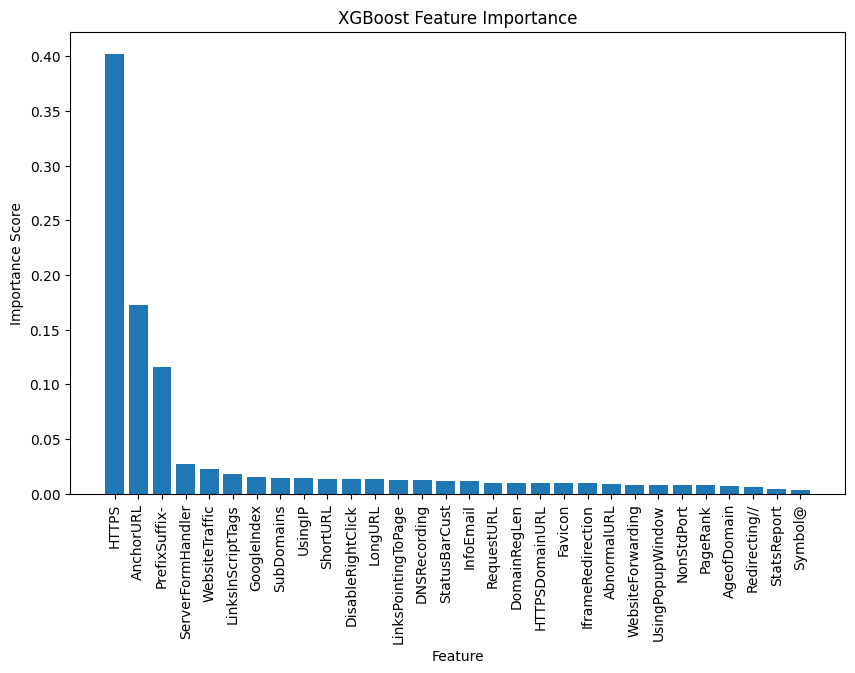

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(X_train.columns)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
7,HTTPS,0.402332
13,AnchorURL,0.172671
5,PrefixSuffix-,0.115783
15,ServerFormHandler,0.027212
25,WebsiteTraffic,0.022486
14,LinksInScriptTags,0.017606
27,GoogleIndex,0.015570
6,SubDomains,0.014102
0,UsingIP,0.014039
2,ShortURL,0.013540


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Identify low importance features and reduce the dataset
threshold = 0.01
low_importance_features = feature_importance_df[feature_importance_df["Importance"] < threshold]["Feature"].tolist()
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Train XGBoost model on reduced features
model_reduced = xgb.XGBClassifier(random_state=42)
model_reduced.fit(X_train_reduced, Y_train)

# Predictions
y_test_xgb_reduced = model_reduced.predict(X_test_reduced)
y_train_xgb_reduced = model_reduced.predict(X_train_reduced)

# Accuracy
acc_train_xgb_reduced = accuracy_score(Y_train, y_train_xgb_reduced)
acc_test_xgb_reduced = accuracy_score(Y_test, y_test_xgb_reduced)

# Precision
precision_train_xgb_reduced = precision_score(Y_train, y_train_xgb_reduced, average='binary')
precision_test_xgb_reduced = precision_score(Y_test, y_test_xgb_reduced, average='binary')

# Recall
recall_train_xgb_reduced = recall_score(Y_train, y_train_xgb_reduced, average='binary')
recall_test_xgb_reduced = recall_score(Y_test, y_test_xgb_reduced, average='binary')

# Output results
print("XGBoost (Reduced Features): Accuracy on training Data: {:.3f}%".format(acc_train_xgb_reduced * 100))
print("XGBoost (Reduced Features): Accuracy on testing Data: {:.3f}%".format(acc_test_xgb_reduced * 100))
print("XGBoost (Reduced Features): Precision on training Data: {:.3f}".format(precision_train_xgb_reduced))
print("XGBoost (Reduced Features): Precision on testing Data: {:.3f}".format(precision_test_xgb_reduced))
print("XGBoost (Reduced Features): Recall on training Data: {:.3f}".format(recall_train_xgb_reduced))
print("XGBoost (Reduced Features): Recall on testing Data: {:.3f}".format(recall_test_xgb_reduced))


XGBoost (Reduced Features): Accuracy on training Data: 97.699%
XGBoost (Reduced Features): Accuracy on testing Data: 95.930%
XGBoost (Reduced Features): Precision on training Data: 0.978
XGBoost (Reduced Features): Precision on testing Data: 0.962
XGBoost (Reduced Features): Recall on training Data: 0.981
XGBoost (Reduced Features): Recall on testing Data: 0.966


**DNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build DNN model
dnn_model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32, verbose=1)

# Predict
Y_test_predicted = (dnn_model.predict(X_test) > 0.5).astype(int).flatten()
Y_train_predicted = (dnn_model.predict(X_train) > 0.5).astype(int).flatten()

# Accuracy
train_acc = accuracy_score(Y_train, Y_train_predicted)
test_acc = accuracy_score(Y_test, Y_test_predicted)

# Precision
train_precision = precision_score(Y_train, Y_train_predicted, average='binary')
test_precision = precision_score(Y_test, Y_test_predicted, average='binary')

# Recall
train_recall = recall_score(Y_train, Y_train_predicted, average='binary')
test_recall = recall_score(Y_test, Y_test_predicted, average='binary')

# Print results
print("DNN: Accuracy on training data: {:.3f}%".format(train_acc * 100))
print("DNN: Accuracy on testing data: {:.3f}%".format(test_acc * 100))
print("DNN: Precision on training data: {:.3f}".format(train_precision))
print("DNN: Precision on testing data: {:.3f}".format(test_precision))
print("DNN: Recall on training data: {:.3f}".format(train_recall))
print("DNN: Recall on testing data: {:.3f}".format(test_recall))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8607 - loss: 0.3240 - val_accuracy: 0.9213 - val_loss: 0.2001
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9155 - loss: 0.2038 - val_accuracy: 0.9415 - val_loss: 0.1402
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9385 - loss: 0.1639 - val_accuracy: 0.9436 - val_loss: 0.1281
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9310 - loss: 0.1634 - val_accuracy: 0.9503 - val_loss: 0.1206
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9321 - loss: 0.1661 - val_accuracy: 0.9539 - val_loss: 0.1128
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9450 - loss: 0.1328 - val_accuracy: 0.9572 - val_loss: 0.1053
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9487 - loss: 0.1254 - val_accuracy: 0.9554 - val_loss: 0.1119
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9498 - loss: 0.1236 - val_accuracy: 0

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Reshape input data for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
cnn_model = keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train_cnn, Y_train, validation_data=(X_test_cnn, Y_test), epochs=20, batch_size=32, verbose=1)

# Predictions
Y_test_predicted = (cnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
Y_train_predicted = (cnn_model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Accuracy
train_acc = accuracy_score(Y_train, Y_train_predicted)
test_acc = accuracy_score(Y_test, Y_test_predicted)

# Precision
train_precision = precision_score(Y_train, Y_train_predicted, average='binary')
test_precision = precision_score(Y_test, Y_test_predicted, average='binary')

# Recall
train_recall = recall_score(Y_train, Y_train_predicted, average='binary')
test_recall = recall_score(Y_test, Y_test_predicted, average='binary')

# Print results
print("CNN: Accuracy on training data: {:.3f}%".format(train_acc * 100))
print("CNN: Accuracy on testing data: {:.3f}%".format(test_acc * 100))
print("CNN: Precision on training data: {:.3f}".format(train_precision))
print("CNN: Precision on testing data: {:.3f}".format(test_precision))
print("CNN: Recall on training data: {:.3f}".format(train_recall))
print("CNN: Recall on testing data: {:.3f}".format(test_recall))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8982 - loss: 0.2522 - val_accuracy: 0.9334 - val_loss: 0.1517
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9434 - loss: 0.1421 - val_accuracy: 0.9340 - val_loss: 0.1502
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9393 - loss: 0.1413 - val_accuracy: 0.9454 - val_loss: 0.1331
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9487 - loss: 0.1234 - val_accuracy: 0.9487 - val_loss: 0.1230
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9550 - loss: 0.1084 - val_accuracy: 0.9481 - val_loss: 0.1218
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9588 - loss: 0.1031 - val_accuracy: 0.9521 - val_loss: 0.1123
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9592 - loss: 0.0942 - val_accuracy: 0.9572 - val_loss: 0.1056
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9626 - loss: 0.0837 - val_accuracy: 0

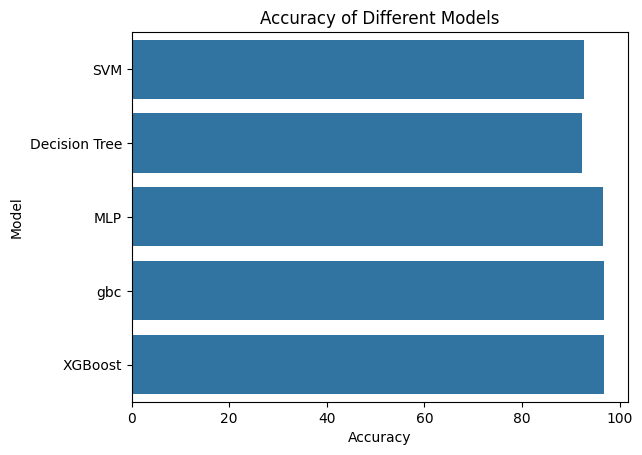

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
models = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'MLP','gbc', 'XGBoost'],
    'Score': [acc_test_svm*100, acc_test_tree*100, acc_test_mlp*100,acc_test_gbc*100, acc_test_xgb*100]})
models.sort_values(by='Score', ascending=False)
sb.barplot(x='Score', y='Model', data=models)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models')
plt.show()


In [ ]:
pip install tldextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.7 MB/s eta 0:00:00


In [ ]:
import re
import tldextract
import pandas as pd
from urllib.parse import urlparse

def extract_url_features(url):
    """Extract features from a URL for phishing detection based on the provided feature set."""
    parsed = urlparse(url)
    domain = tldextract.extract(url)

    features = {
        'HTTPS': 1 if parsed.scheme == 'https' else 0,
        'AnchorURL': 1 if '#' in url else 0,
        'PrefixSuffix-': 1 if '-' in domain.domain else 0,
        'ServerFormHandler': 1 if "mailto:" in url else 0,
        'WebsiteTraffic': 1 if len(url)>1 else 0,  # Placeholder (real traffic data requires external APIs)
        'LinksInScriptTags': url.count('<script>') + url.count('<iframe>'),
        'GoogleIndex': 1 if "google.com" in url else 0,  # Placeholder
        'SubDomains': domain.subdomain.count('.') + 1 if domain.subdomain else 0,
        'UsingIP': 1 if re.match(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$", parsed.netloc) else 0,
        'ShortURL': 1 if any(s in parsed.netloc for s in ['bit.ly', 'goo.gl', 'tinyurl']) else 0,
        'DisableRightClick': 0,  # Placeholder (requires JavaScript analysis)
        'LongURL':1 if len(url)>1 else 0,
        'LinksPointingToPage': url.count('http'),
        'DNSRecording': 0,  # Placeholder (requires domain lookup)
        'StatusBarCust': 0,  # Placeholder (needs JavaScript execution)
        'InfoEmail': 1 if "@" in url else 0,
       'RequestURL': 1 if len(parsed.query) > 1 else 0


    }

    return pd.DataFrame([features])

# Take URL input from the user
url = input("Enter a URL: ")
url_features = extract_url_features(url)
print("Extracted Features:")
print(url_features)
url_features_reduced = url_features[model.reduced.feature_names_in_]

prediction = model.reduced.predict(url_features_reduced)
print("Phishing Prediction:", "✅ Legitimate " if prediction[0] == 1 else "⚠️ Phishing ")

Enter a URL: https://colab.research.google.com/drive/1MhsNS4tjOFHe0dRY7S4QsZUbAm13D8vv?usp=sharing#scrollTo=p9p-vRWMw2Nr
Extracted Features:
   HTTPS  AnchorURL  PrefixSuffix-  ServerFormHandler  WebsiteTraffic  \
0      1          1              0                  0               1   

   LinksInScriptTags  GoogleIndex  SubDomains  UsingIP  ShortURL  \
0                  0            1           2        0         0   

   DisableRightClick  LongURL  LinksPointingToPage  DNSRecording  \
0                  0        1                    1             0   

   StatusBarCust  InfoEmail  RequestURL  
0              0          0           1  
Phishing Prediction: ✅ Legitimate 


** final model**



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN-Enhanced DNN Model
dnn_model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train_cnn, Y_train, validation_data=(X_test_cnn, Y_test), epochs=20, batch_size=32, verbose=1)

# Make predictions using reshaped CNN data
Y_test_predicted = (dnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
Y_train_predicted = (dnn_model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Accuracy
train_acc = accuracy_score(Y_train, Y_train_predicted)
test_acc = accuracy_score(Y_test, Y_test_predicted)

# Precision
train_precision = precision_score(Y_train, Y_train_predicted, average='binary')
test_precision = precision_score(Y_test, Y_test_predicted, average='binary')

# Recall
train_recall = recall_score(Y_train, Y_train_predicted, average='binary')
test_recall = recall_score(Y_test, Y_test_predicted, average='binary')

# Output results
print("CNN-DNN: Accuracy on training data: {:.3f}%".format(train_acc * 100))
print("CNN-DNN: Accuracy on testing data: {:.3f}%".format(test_acc * 100))
print("CNN-DNN: Precision on training data: {:.3f}".format(train_precision))
print("CNN-DNN: Precision on testing data: {:.3f}".format(test_precision))
print("CNN-DNN: Recall on training data: {:.3f}".format(train_recall))
print("CNN-DNN: Recall on testing data: {:.3f}".format(test_recall))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8930 - loss: 0.2584 - val_accuracy: 0.9349 - val_loss: 0.1592
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9431 - loss: 0.1444 - val_accuracy: 0.9530 - val_loss: 0.1224
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9538 - loss: 0.1134 - val_accuracy: 0.9524 - val_loss: 0.1142
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9596 - loss: 0.1007 - val_accuracy: 0.9569 - val_loss: 0.1024
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9676 - loss: 0.0801 - val_accuracy: 0.9587 - val_loss: 0.1060
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9690 - loss: 0.0743 - val_accuracy: 0.9560 - val_loss: 0.1080
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9712 - loss: 0.0690 - val_accuracy: 0.9608 - val_loss: 0.0893
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9761 - loss: 0.0610 - val_accuracy: 0.950

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv1D, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Model
dnn_model = keras.Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),

    GlobalAveragePooling1D(),

    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
dnn_model.fit(X_train_cnn, Y_train, validation_data=(X_test_cnn, Y_test),
              epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping, reduce_lr])

# Predict (on reshaped data)
Y_test_predicted = (dnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
Y_train_predicted = (dnn_model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Metrics
train_acc = accuracy_score(Y_train, Y_train_predicted)
test_acc = accuracy_score(Y_test, Y_test_predicted)

train_precision = precision_score(Y_train, Y_train_predicted, average='binary')
test_precision = precision_score(Y_test, Y_test_predicted, average='binary')

train_recall = recall_score(Y_train, Y_train_predicted, average='binary')
test_recall = recall_score(Y_test, Y_test_predicted, average='binary')

# Print results
print("CNN-DNN (Enhanced): Accuracy on training data: {:.3f}%".format(train_acc * 100))
print("CNN-DNN (Enhanced): Accuracy on testing data: {:.3f}%".format(test_acc * 100))
print("CNN-DNN (Enhanced): Precision on training data: {:.3f}".format(train_precision))
print("CNN-DNN (Enhanced): Precision on testing data: {:.3f}".format(test_precision))
print("CNN-DNN (Enhanced): Recall on training data: {:.3f}".format(train_recall))
print("CNN-DNN (Enhanced): Recall on testing data: {:.3f}".format(test_recall))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8395 - loss: 0.3491 - val_accuracy: 0.4429 - val_loss: 0.9890 - learning_rate: 0.0010
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9112 - loss: 0.2171 - val_accuracy: 0.8797 - val_loss: 0.2679 - learning_rate: 0.0010
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9178 - loss: 0.1858 - val_accuracy: 0.9343 - val_loss: 0.1577 - learning_rate: 0.0010
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9359 - loss: 0.1631 - val_accuracy: 0.9279 - val_loss: 0.1740 - learning_rate: 0.0010
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9367 - loss: 0.1549 - val_accuracy: 0.9325 - val_loss: 0.1773 - learning_rate: 0.0010
Epoch 6/50
240/242 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9373 - loss: 0.1490
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9373 - loss: 0.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Reshape data for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# CNN-Enhanced DNN Model
dnn_model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# Compile Model with AdamW optimizer
dnn_model.compile(optimizer=optimizers.AdamW(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Learning Rate Scheduler & Early Stopping
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
dnn_model.fit(X_train_cnn, Y_train, validation_data=(X_test_cnn, Y_test),
              epochs=50, batch_size=64, callbacks=[lr_scheduler, early_stopping])

# Evaluate Model
test_loss, test_acc = dnn_model.evaluate(X_test_cnn, Y_test)
print(f"\nTest Accuracy from Keras Evaluate: {test_acc * 100:.2f}%")

# Predict and calculate additional metrics
Y_test_predicted = (dnn_model.predict(X_test_cnn) > 0.5).astype(int).flatten()
Y_train_predicted = (dnn_model.predict(X_train_cnn) > 0.5).astype(int).flatten()

# Metrics
train_acc = accuracy_score(Y_train, Y_train_predicted)
test_acc = accuracy_score(Y_test, Y_test_predicted)

train_precision = precision_score(Y_train, Y_train_predicted)
test_precision = precision_score(Y_test, Y_test_predicted)

train_recall = recall_score(Y_train, Y_train_predicted)
test_recall = recall_score(Y_test, Y_test_predicted)

# Print results
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Train Precision: {train_precision:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Train Recall: {train_recall:.3f}")
print(f"Test Recall: {test_recall:.3f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8367 - loss: 0.3547 - val_accuracy: 0.7229 - val_loss: 0.5756 - learning_rate: 5.0000e-04
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9337 - loss: 0.1744 - val_accuracy: 0.7380 - val_loss: 0.4589 - learning_rate: 5.0000e-04
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9410 - loss: 0.1433 - val_accuracy: 0.9391 - val_loss: 0.1818 - learning_rate: 5.0000e-04
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9558 - loss: 0.1102 - val_accuracy: 0.9503 - val_loss: 0.1271 - learning_rate: 5.0000e-04
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9559 - loss: 0.1031 - val_accuracy: 0.9572 - val_loss: 0.1109 - learning_rate: 5.0000e-04
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9603 - loss: 0.0997 - val_accuracy: 0.9614 - val_loss: 0.0998 - learning_rate: 5.0000e-04
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.96

In [ ]:
import re
import tldextract
import pandas as pd
from urllib.parse import urlparse

def extract_url_features(url):
    """Extract features from a URL for phishing detection based on the provided feature set."""
    parsed = urlparse(url)
    domain = tldextract.extract(url)

    features = {
        'HTTPS': 1 if parsed.scheme == 'https' else 0,
        'AnchorURL': 1 if '#' in url else 0,
        'PrefixSuffix-': 1 if '-' in domain.domain else 0,
        'ServerFormHandler': 1 if "mailto:" in url else 0,
        'WebsiteTraffic': len(url),  # Placeholder (real traffic data requires external APIs)
        'LinksInScriptTags': url.count('<script>') + url.count('<iframe>'),
        'GoogleIndex': 1 if "google.com" in url else 0,  # Placeholder
        'SubDomains': domain.subdomain.count('.') + 1 if domain.subdomain else 0,
        'UsingIP': 1 if re.match(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$", parsed.netloc) else 0,
        'ShortURL': 1 if any(s in parsed.netloc for s in ['bit.ly', 'goo.gl', 'tinyurl']) else 0,
        'DisableRightClick': 0,  # Placeholder (requires JavaScript analysis)
        'LongURL': len(url),
        'LinksPointingToPage': url.count('http'),
        'DNSRecording': 0,  # Placeholder (requires domain lookup)
        'StatusBarCust': 0,  # Placeholder (needs JavaScript execution)
        'InfoEmail': 1 if "@" in url else 0,
        'RequestURL': len(parsed.query),
        'DomainRegLen': len(domain.domain),
        'HTTPSDomainURL': 1 if 'https' in parsed.netloc else 0,
        'Favicon': 0,  # Placeholder (requires website fetch)
        'IframeRedirection': 1 if '<iframe>' in url else 0,
        'AbnormalURL': 1 if len(parsed.netloc) < 4 else 0,
        'WebsiteForwarding': url.count('//'),
        'UsingPopupWindow': 0,  # Placeholder (needs JavaScript detection)
        'NonStdPort': 1 if ':' in parsed.netloc else 0,
        'PageRank': 0,  # Placeholder (requires external API)
        'AgeofDomain': 0,  # Placeholder (requires WHOIS lookup)
        'Redirecting//': url.count('//') > 1,
        'StatsReport': 0,  # Placeholder
        'Symbol@': 1 if '@' in url else 0
    }

    return pd.DataFrame([features])

# Take URL input from the user
url = input("Enter a URL: ")
url_features = extract_url_features(url)
print("Extracted Features:")
print(url_features)


prediction = model.reduced.predict(url_features)

print(prediction)

Enter a URL: jhe@
Extracted Features:
   HTTPS  AnchorURL  PrefixSuffix-  ServerFormHandler  WebsiteTraffic  \
0      0          0              0                  0               4   

   LinksInScriptTags  GoogleIndex  SubDomains  UsingIP  ShortURL  ...  \
0                  0            0           0        0         0  ...   

   IframeRedirection  AbnormalURL  WebsiteForwarding  UsingPopupWindow  \
0                  0            1                  0                 0   

   NonStdPort  PageRank  AgeofDomain  Redirecting//  StatsReport  Symbol@  
0           0         0            0          False            0        1  

[1 rows x 30 columns]


ValueError: feature_names mismatch: ['UsingIP', 'LongURL', 'ShortURL', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'StatusBarCust', 'DisableRightClick', 'DNSRecording', 'WebsiteTraffic', 'GoogleIndex', 'LinksPointingToPage'] ['HTTPS', 'AnchorURL', 'PrefixSuffix-', 'ServerFormHandler', 'WebsiteTraffic', 'LinksInScriptTags', 'GoogleIndex', 'SubDomains', 'UsingIP', 'ShortURL', 'DisableRightClick', 'LongURL', 'LinksPointingToPage', 'DNSRecording', 'StatusBarCust', 'InfoEmail', 'RequestURL', 'DomainRegLen', 'HTTPSDomainURL', 'Favicon', 'IframeRedirection', 'AbnormalURL', 'WebsiteForwarding', 'UsingPopupWindow', 'NonStdPort', 'PageRank', 'AgeofDomain', 'Redirecting//', 'StatsReport', 'Symbol@']
training data did not have the following fields: StatsReport, UsingPopupWindow, AbnormalURL, DomainRegLen, AgeofDomain, PageRank, HTTPSDomainURL, Redirecting//, IframeRedirection, Symbol@, WebsiteForwarding, Favicon, NonStdPort

In [ ]:
x=model.reduced.predict(url_features)
if x == 1:
  print("phishing")
else:
  print("not phishing")

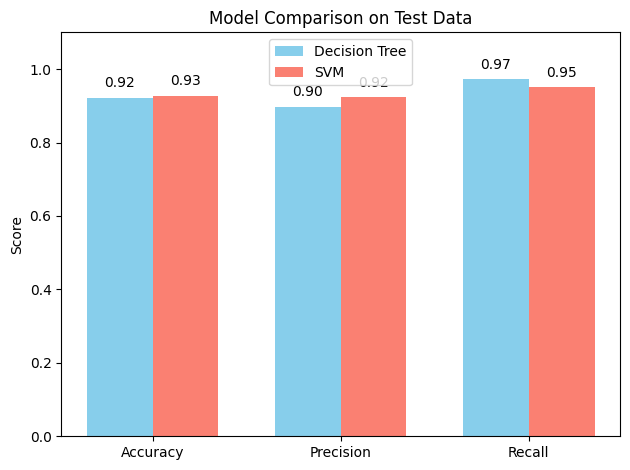

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Decision Tree
acc_dt = acc_test_tree
prec_dt = precision_test_tree
recall_dt = recall_test_tree

# Metrics for SVM
acc_svm = acc_test_svm
prec_svm = precision_test_svm
recall_svm = recall_test_svm

# Metric names
metrics = ['Accuracy', 'Precision', 'Recall']

# Values for each model
decision_tree_scores = [acc_dt, prec_dt, recall_dt]
svm_scores = [acc_svm, prec_svm, recall_svm]

# Bar chart settings
x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, decision_tree_scores, width, label='Decision Tree', color='skyblue')
bars2 = ax.bar(x + width/2, svm_scores, width, label='SVM', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Model Comparison on Test Data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Add data labels on top of bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


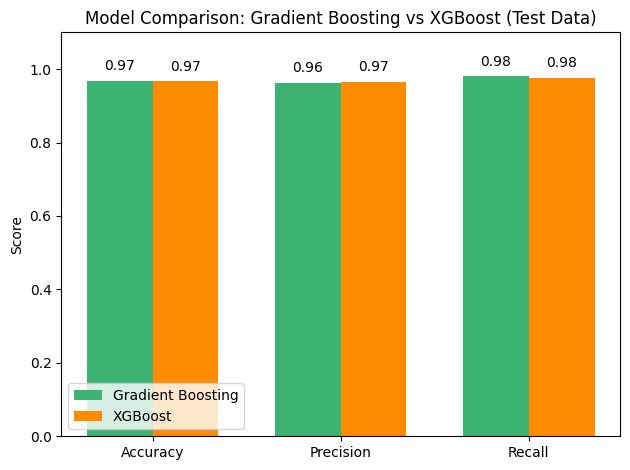

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Gradient Boosting
acc_gbc = acc_test_gbc
prec_gbc = precision_test_gbc
recall_gbc = recall_test_gbc

# Metrics for XGBoost
acc_xgb = acc_test_xgb
prec_xgb = precision_test_xgb
recall_xgb = recall_test_xgb

# Metric labels
metrics = ['Accuracy', 'Precision', 'Recall']

# Model scores
gbc_scores = [acc_gbc, prec_gbc, recall_gbc]
xgb_scores = [acc_xgb, prec_xgb, recall_xgb]

# Bar positions
x = np.arange(len(metrics))
width = 0.35

# Plotting the bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, gbc_scores, width, label='Gradient Boosting', color='mediumseagreen')
bars2 = ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='darkorange')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Gradient Boosting vs XGBoost (Test Data)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Add data labels above bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


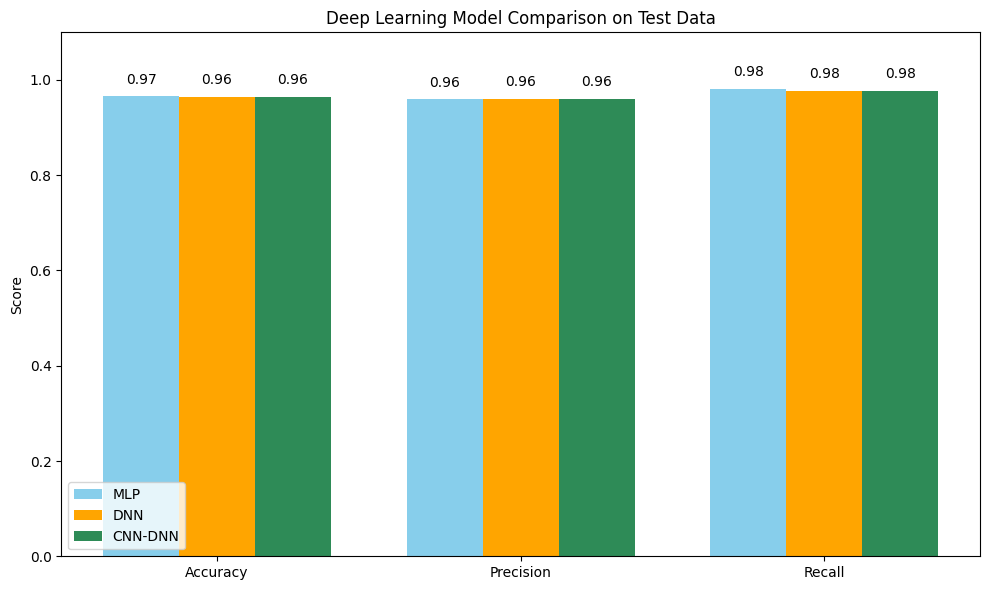

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Test metrics from each model
accuracy_scores = [
    acc_test_mlp,
    test_acc,
    test_acc  # For CNN-DNN, reused name
]

precision_scores = [
    precision_test_mlp,
    test_precision,
    test_precision
]

recall_scores = [
    recall_test_mlp,
    test_recall,
    test_recall
]

# Combine all
metrics = ['Accuracy', 'Precision', 'Recall']
mlp_metrics = [acc_test_mlp, precision_test_mlp, recall_test_mlp]
dnn_metrics = [test_acc, test_precision, test_recall]
cnn_dnn_metrics = [test_acc, test_precision, test_recall]

# Grouped data
data = [mlp_metrics, dnn_metrics, cnn_dnn_metrics]
labels = ['MLP', 'DNN', 'CNN-DNN']

# Plot setup
x = np.arange(len(metrics))  # the label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each model
bars1 = ax.bar(x - width, mlp_metrics, width, label='MLP', color='skyblue')
bars2 = ax.bar(x, dnn_metrics, width, label='DNN', color='orange')
bars3 = ax.bar(x + width, cnn_dnn_metrics, width, label='CNN-DNN', color='seagreen')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Deep Learning Model Comparison on Test Data')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Add score labels on top
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
